<a href="https://colab.research.google.com/github/vxima/CienciaDeDados/blob/main/SteamGames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ciencia de Dados**

Dupla: Victor Ximenes e Pedro Nogueira

_link de onde foi extraido o dataset:_ _https://www.kaggle.com/datasets/nikdavis/steam-store-games_

Para esse projeto utilizaremos um dataset muito interessante sobre os jogos da Steam, a maior plataforma de jogos de computador.
Para isso vamos começar baixando-o.

## Bibliotecas

Para o projeto funcionar, precisaremos importar as seguintes bibiotecas:

In [ ]:
!pip install tensorflow
!pip install scipy
!pip install fancyimpute
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from fancyimpute import KNN
from numpy import log10
from numpy import abs
from scipy import stats
from scipy.stats import mannwhitneyu, ttest_ind
import seaborn as sns 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 7.3 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=94f09b211a368375b034426c67ad49f6c30d87072cb30119e84e0f7a6d1b9249
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=a1196f33afdfebdbd7b715ca1369ca9fb2d5884a1f83d088367e72b1028c22f8
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


Agora que tesmo tudo pronto para começar, vamos vizualizar o dataset, para depois começar o processamento de dados.

## Coleta de dados

O dataset desejado está no kaggle, logo iremos instalar uma biblioteca que nos permite baixar esses dados. Na célula abaixo preparamos as credenciais e o diretorio para baixar o dataset.

In [ ]:
# Instalacao da API do kaggle
!pip install kaggle

# Setup de key para poder ter acesso aos dataset no servidor
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"victorximenes","key":"aedbc65119948faf6b7ecf1f5708377a"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Agora finalmente importamos a API do kaggle e a usamos para baixar o dataset desejado no diretorio especificado anteriormente.

In [ ]:
# importacao do API do kaggle para o collab
import kaggle

# download e extracao dos dados zipados
!kaggle datasets download -d nikdavis/steam-store-games
!unzip -o "/content/steam-store-games.zip"


 97% 34.0M/35.2M [00:00<00:00, 165MB/s] 
100% 35.2M/35.2M [00:00<00:00, 152MB/s]
Archive:  /content/steam-store-games.zip
  inflating: steam.csv               
  inflating: steam_description_data.csv  
  inflating: steam_media_data.csv    
  inflating: steam_requirements_data.csv  
  inflating: steam_support_info.csv  
  inflating: steamspy_tag_data.csv   


Por fim declaramos uma variavel(steam) para manusear o dataset.

In [ ]:
PATH = "/content/steam.csv"

steam = pd.read_csv(PATH)

### Visualizar dataset

Vamos visualizar de forma mais geral o dataset para entende-lo melhor e começar a observar pontos de tratamento.

In [ ]:
steam.head(100)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3500,Mystery P.I.™ - The Lottery Ticket,2007-10-16,1,SpinTop Games,"PopCap Games, Inc.",windows,0,Single-player,Casual,Casual;Hidden Object,0,10,3,0,0,20000-50000,4.25
96,3510,Amazing Adventures The Lost Tomb™,2007-12-13,1,SpinTop Games,"PopCap Games, Inc.",windows,0,Single-player,Casual,Casual;Hidden Object;Puzzle,0,21,8,0,0,20000-50000,4.25
97,3520,Mystery P.I.™ - The Vegas Heist,2008-06-05,1,SpinTop Games,"PopCap Games, Inc.",windows,0,Single-player,Casual,Casual;Hidden Object,0,11,5,0,0,20000-50000,4.25
98,3530,Amazing Adventures Around the World,2009-04-15,1,SpinTop Games,"PopCap Games, Inc.",windows,0,Single-player,Casual,Casual;Hidden Object;Puzzle,0,23,7,0,0,20000-50000,4.25


Vamos ver agora as informações descritivas desse dataset.

In [ ]:
steam.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


Vendo as colunas do dataset.

In [ ]:
steam.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

Por fim vamos ver os tipos de cada coluna.

In [ ]:
steam.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

Agora que vizualisamos os dados, vamos para uma etapa muito importante, o pré-processamento dos dados!

## Pré-processamento dos dados

Começamos aplicando a correção de tipos.

### Definição de tipos

Vimos de cara que a coluna "appid" não será útil para o nosso projeto, então vamos retirá-la.

In [ ]:
steam = steam.drop('appid', axis=1)

Relembrando os tipos iniciais das colunas temos:

In [ ]:
steam.dtypes

name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

Observando atentamente esses tipos, notamos que algumas colunas podem ter tipos mais apropriados!


"name" estava como objeto, mudamos para string


"release_date" estava como objeto, mudamos para datatime

"developer", "publisher", e "owners" optamos por mudar os seus dados para categoricos, para podermos utiliza-los de forma mais apropriada

"platforms", "categories", "genres" e "steamspy_tags" são colunas que funcionam condensado varias informações em uma só string, o que deixa bem complicado de vizualizar e manipular, por isso tomamos a **decisão** de para cada uma dessas colunas, observar as informações que mais se repetem e transformar cada informação em uma coluna categorica, por exemplo, notamos que o genero "multi-player" se repete muito, então faremos uma coluna categorica para essa informação.

In [ ]:
## Correção dos tipos
steam['name'] = steam['name'].astype('category')
steam['release_date'] = pd.to_datetime(steam['release_date'] , format='%Y-%m-%d')
steam['developer'] = steam['developer'].astype('category')
steam['publisher'] = steam['publisher'].astype('category')
steam['owners'] = steam['owners'].astype('category')


steam['platforms'] = steam['platforms'].astype('string')
steam['categories'] = steam['categories'].astype('string')
steam['genres'] = steam['genres'].astype('string')
steam['steamspy_tags'] = steam['steamspy_tags'].astype('string')


Vamos alterar owners que são "ranges" para a média desse "range", ou seja, só o jogo tem entre 10-20 owners, diremos que ele tem (10+20)/2 owners

In [ ]:
steam['owners'] = steam['owners'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)
steam['owners'] = steam['owners'].astype('int64')

Note que começamos transformando "platforms", "categories", "genres" e "steamspy_tags" em string, em seguida vamos de fato criar novas colunas com essas strings, mas antes vamos ver como os tipos estão agora:

In [ ]:
steam.dtypes

name                      category
release_date        datetime64[ns]
english                      int64
developer                 category
publisher                 category
platforms                   string
required_age                 int64
categories                  string
genres                      string
steamspy_tags               string
achievements                 int64
positive_ratings             int64
negative_ratings             int64
average_playtime             int64
median_playtime              int64
owners                       int64
price                      float64
dtype: object

Vamos finalmente tratar as colunas "platforms", "genres", "categories" e "steamspy_tags".

Começando com "platforms", iremos criar uma coluna para cada uma das 3 plataformas:

In [ ]:
##Criar novas colunas através da coluna "plataforma"
steam['windows'] = steam['platforms'].apply(lambda x : 1 if 'windows' in x.lower() else 0 )
steam['mac'] = steam['platforms'].apply(lambda x : 1 if 'mac' in x.lower() else 0 )
steam['linux'] = steam['platforms'].apply(lambda x : 1 if 'linux' in x.lower() else 0 )
steam = steam.drop('platforms', axis=1)
print(steam[['name', 'windows', 'mac', 'linux']])

                             name  windows  mac  linux
0                  Counter-Strike        1    1      1
1           Team Fortress Classic        1    1      1
2                   Day of Defeat        1    1      1
3              Deathmatch Classic        1    1      1
4       Half-Life: Opposing Force        1    1      1
...                           ...      ...  ...    ...
27070             Room of Pandora        1    0      0
27071                   Cyber Gun        1    0      0
27072            Super Star Blast        1    0      0
27073  New Yankee 7: Deer Hunters        1    1      0
27074                   Rune Lord        1    1      0

[27075 rows x 4 columns]


Vamos agora tratar a coluna "categories". Pelos valores observados na coluna, decidimos extrair se o jogo é single_player ou multi_player, porque todos os outros valores observados são subconjunto desses dois.

In [ ]:
##Criar novas colunas através da coluna "categories"
steam['multi_player'] = steam['categories'].apply(lambda x: 1 if 'multi' in x.lower() else 0)
steam['single_player'] = steam['categories'].apply(lambda x: 1 if 'single' in x.lower() else 0)
steam = steam.drop('categories', axis=1)
print(steam[['name', 'single_player', 'multi_player']])

                             name  single_player  multi_player
0                  Counter-Strike              0             1
1           Team Fortress Classic              0             1
2                   Day of Defeat              0             1
3              Deathmatch Classic              0             1
4       Half-Life: Opposing Force              1             1
...                           ...            ...           ...
27070             Room of Pandora              1             0
27071                   Cyber Gun              1             0
27072            Super Star Blast              1             1
27073  New Yankee 7: Deer Hunters              1             0
27074                   Rune Lord              1             0

[27075 rows x 3 columns]


Agora vamos tratar as colunas "steamspy_tags" e "genres".

Ao analisar essas colunas, podemos notar que ambas descrevem os generos do jogo, a questão é que em "genres" temos os generos que a própria steam descreve o jogo, já em "steamspy_tags" é como a steamspy os descreve. Para deixar claro, steamspy é uma plataforma que analisa a steam e tem suas próprias métricas.

Como solução para essa situação, vamos contar quais são os generos que mais se repetem nas duas colunas, e decidir assim quais generos terão sua própria coluna!

In [ ]:
##Lista que vai conter todos os generos
genres_list = []
##Juntando as duas colunas
concat_tag_genres = steam['steamspy_tags'] + ";" + steam['genres']
##Separando as palavras
concat_tag_genres = concat_tag_genres.apply(lambda word: word.split(';'))
##Coletando os generos da coluna concatenada

concat_tag_genres.apply(lambda word_list: genres_list.extend(word_list))

##Transformando essa lista em uma coluna para poder usar o método de contagem nativo do pandas
temp_df = pd.DataFrame()
temp_df['genre_list'] = genres_list
most_freq = temp_df['genre_list'].value_counts()
print(most_freq[:10])

Indie           35653
Action          22225
Casual          18415
Adventure       17802
Strategy         9420
Simulation       8478
RPG              7096
Early Access     5921
Free to Play     3366
Sports           2103
Name: genre_list, dtype: int64


Vamos selecionar os três mais frequentes, "Indie", "Action" e "Casual" e, além disso, vamos escolher também "RPG" e "Simulation", pois são gêneros relevantes e se diferem bastante dos três gêneros mais frequentes.

In [ ]:
concat_tag_genres = steam['steamspy_tags'] + ";" + steam['genres']

steam['indie'] = concat_tag_genres.apply(lambda word: 1 if 'indie' in word.lower() else 0)
steam['action'] = concat_tag_genres.apply(lambda word: 1 if 'action' in word.lower() else 0)
steam['casual'] = concat_tag_genres.apply(lambda word: 1 if 'casual' in word.lower() else 0)
steam['rpg'] = concat_tag_genres.apply(lambda word: 1 if 'rpg' in word.lower() else 0)
steam['simulation'] = concat_tag_genres.apply(lambda word: 1 if 'simulation' in word.lower() else 0)
steam = steam.drop('genres', axis=1)
steam = steam.drop('steamspy_tags', axis=1)
print(steam[['name', 'indie', 'action', 'casual', 'rpg', 'simulation']])

                             name  indie  action  casual  rpg  simulation
0                  Counter-Strike      0       1       0    0           0
1           Team Fortress Classic      0       1       0    0           0
2                   Day of Defeat      0       1       0    0           0
3              Deathmatch Classic      0       1       0    0           0
4       Half-Life: Opposing Force      0       1       0    0           0
...                           ...    ...     ...     ...  ...         ...
27070             Room of Pandora      1       0       1    0           0
27071                   Cyber Gun      1       1       0    0           0
27072            Super Star Blast      1       1       1    0           0
27073  New Yankee 7: Deer Hunters      1       0       1    0           0
27074                   Rune Lord      1       0       1    0           0

[27075 rows x 6 columns]


Com isso definimos e garantimos que as colunas têm tipos apropriados e vantajosos para a nossa análise. Além disse criamos colunas categóricas para descrever colunas densas e não praticas de se trabalhar.

Esse método abaixo foi criado para auxiliar furuas operações:

In [ ]:
def define_type(df):
  df['name'] = df['name'].astype('category')
  df['release_date'] = df['release_date'].astype('datetime64[D]')
  df['english'] = df['english'].astype('category')
  df['developer'] = df['developer'].astype('category')
  df['publisher'] = df['publisher'].astype('category')
  df['required_age'] = df['required_age'].astype('category')
  df['achievements'] = df['achievements'].astype('category')
  df['positive_ratings'] = df['positive_ratings'].astype('category')
  df['negative_ratings'] = df['negative_ratings'].astype('category')
  df['median_playtime'] = df['median_playtime'].astype('category')
  df['average_playtime'] = df['average_playtime'].astype('category')
  df['owners'] = df['owners'].astype('category')
  df['price'] = df['price'].astype('float64')
  df['windows'] = df['windows'].astype('category')
  df['mac'] = df['mac'].astype('category')
  df['linux'] = df['linux'].astype('category')
  df['multi_player'] = df['multi_player'].astype('category')
  df['single_player'] = df['single_player'].astype('category')
  df['indie'] = df['indie'].astype('category')
  df['action'] = df['action'].astype('category')
  df['casual'] = df['casual'].astype('category')
  df['rpg'] = df['rpg'].astype('category')
  df['simulation'] = df['simulation'].astype('category')

O próximo passo é fazer o **tratamento de dados ausentes**

### Tratamento de dados ausentes

As vezes podem ter dados faltando no dataset, para lidar com esses problema, podem ser empregadas algumas técnicas

Primeiramente, vamos ver se no nosso dataset temos dados ausentes:

In [ ]:
print(steam.isnull().sum())

name                0
release_date        0
english             0
developer           0
publisher           0
required_age        0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
windows             0
mac                 0
linux               0
multi_player        0
single_player       0
indie               0
action              0
casual              0
rpg                 0
simulation          0
dtype: int64


Notamos algo muito bom aqui, não temos nenhum dado ausente!

Porém como o intuido desse projeto também é testar métodos para tratar dados ausentes, iremos fazer o seguinte: Vamos gerar uma cópia do nosso dataset, e nessa cópia iremos aleatoriamente deletar alguns dados, e depois disso vamos aplicar os métodos de tratamento de dados ausentes. Como temos a tabela original, também podemos comparar qual método conseguiu chegar mais perto dos valores originais!


#### Criação de dados ausentes

Visto que não existe dados ausentes nem duplicados, vamos fazer uma copia do dataset e remover dados dele aleatoriamente

In [ ]:
def Random_missing(x):
  threshold = 0.95
  chance = np.random.random_sample()
  if chance > threshold:
    return None
  else:
    return x

steam_incomplete = steam.applymap(Random_missing)
define_type(steam_incomplete)
print(steam_incomplete.isnull().sum()) #Agora possui dados faltantes de aproximadamente 10% do dataset 
print(steam_incomplete.isnull().sum(axis=1).tolist()) #Lista indicando quantos elementos estão faltando por linha

steam_incomplete.head()


name                1309
release_date        1324
english             1345
developer           1368
publisher           1313
required_age        1363
achievements        1355
positive_ratings    1362
negative_ratings    1361
average_playtime    1366
median_playtime     1326
owners              1343
price               1326
windows             1397
mac                 1304
linux               1316
multi_player        1388
single_player       1341
indie               1302
action              1321
casual              1336
rpg                 1394
simulation          1385
dtype: int64
[1, 3, 0, 0, 0, 3, 0, 0, 1, 1, 3, 3, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 3, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 3, 1, 0, 1, 3, 2, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 0, 2, 3, 1, 0, 0, 3, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 1, 3, 1, 0, 2, 2, 2, 1, 2, 1, 3, 2, 0, 3, 1, 3, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 

,name,release_date,english,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,average_playtime,...,windows,mac,linux,multi_player,single_player,indie,action,casual,rpg,simulation
0,Counter-Strike,2000-11-01,1.0,Valve,Valve,0.0,0.0,124534.0,3339.0,17612.0,...,NaN,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Team Fortress Classic,1999-04-01,1.0,Valve,Valve,0.0,0.0,3318.0,NaN,277.0,...,1.0,1.0,1.0,1.0,NaN,0.0,1.0,0.0,0.0,NaN
2,Day of Defeat,2003-05-01,1.0,Valve,Valve,0.0,0.0,3416.0,398.0,187.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Deathmatch Classic,2001-06-01,1.0,Valve,Valve,0.0,0.0,1273.0,267.0,258.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Half-Life: Opposing Force,1999-11-01,1.0,Gearbox Software,Valve,0.0,0.0,5250.0,288.0,624.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
steam_incomplete.dtypes

name                      category
release_date        datetime64[ns]
english                   category
developer                 category
publisher                 category
required_age              category
achievements              category
positive_ratings          category
negative_ratings          category
average_playtime          category
median_playtime           category
owners                    category
price                      float64
windows                   category
mac                       category
linux                     category
multi_player              category
single_player             category
indie                     category
action                    category
casual                    category
rpg                       category
simulation                category
dtype: object

#### Removendo instancias

Vamos tentar remover linhas que possuam dado faltante

vamos ver o tamanho do dataframe antes do tratamento para poder comparar depois:

In [ ]:
steam_incomplete.shape

(27075, 23)

In [ ]:
steam_brute_removal = steam_incomplete.dropna()
print("Depois de remover qualquer linha com dado faltando: " , len(steam_brute_removal))
print("Porcentagem:", len(steam_brute_removal)/len(steam)*100 , "%")

Depois de remover qualquer linha com dado faltando:  8428
Porcentagem: 31.128347183748843 %


Dessa forma, não é uma boa pratica simplesmente remover linhas que estao com algum dado ausente, pois deixaria o dataset em média com apenas 30% do tamanho original

In [ ]:
steam_parcial_removal = steam_incomplete.dropna(thresh=0.9*len(steam_incomplete.columns)) #Remover linhas que mais de 10% seja ausente 
print("Linhas removidas:" , len(steam_incomplete) - len(steam_parcial_removal))
print(steam_parcial_removal.isnull().sum())
print("Porcentagem:", len(steam_parcial_removal)/len(steam)*100 , "%")

Linhas removidas: 2768
name                 931
release_date         916
english              963
developer            970
publisher            939
required_age         956
achievements         938
positive_ratings     946
negative_ratings     959
average_playtime     961
median_playtime      942
owners               922
price                934
windows             1008
mac                  924
linux                921
multi_player        1017
single_player        944
indie                921
action               948
casual               918
rpg                  958
simulation           979
dtype: int64
Porcentagem: 89.77654662973222 %


Com uma remoção mais "Tolerante" a dados faltantes, conseguimos remover apenas as "piores" instancias, melhorando a qualidade do dataset sem perder tantas linhas.

#### Preencher dados ausentes

##### moda e mediana

Primeiramente vamos ver a correlação antes da mudança:

In [ ]:
steam_parcial_removal.apply(lambda x: x.cat.codes if x.dtype == 'category' else x).corr(method='spearman')

,name,english,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,...,windows,mac,linux,multi_player,single_player,indie,action,casual,rpg,simulation
name,1.000000,-0.053378,0.030955,0.026334,-0.005843,-0.004482,0.010554,-0.007206,-0.004128,-0.005444,...,0.002640,-0.003388,-0.004480,-0.008529,-0.016861,0.006996,-0.013758,-0.013247,0.019318,0.002654
english,-0.053378,1.000000,-0.043061,-0.035780,-0.010355,0.030873,0.010750,0.017011,0.017076,0.018497,...,0.001434,0.021051,0.017906,0.001603,-0.001434,0.008944,0.028060,0.001986,-0.049376,-0.013569
developer,0.030955,-0.043061,1.000000,0.604609,-0.012070,-0.029690,-0.020189,-0.019370,-0.016088,-0.016365,...,0.002703,-0.020625,-0.010481,-0.018170,-0.000905,0.001762,-0.003276,0.006994,0.005404,0.026132
publisher,0.026334,-0.035780,0.604609,1.000000,-0.017327,-0.033229,-0.028912,-0.025191,-0.031386,-0.027960,...,0.005549,-0.025913,-0.023813,0.000452,-0.010594,0.001506,-0.003835,-0.003824,-0.005565,0.028887
required_age,-0.005843,-0.010355,-0.012070,-0.017327,1.000000,0.022233,0.054148,0.062858,0.055777,0.061784,...,-0.021679,-0.019732,-0.016325,0.006366,-0.015140,-0.050193,0.028054,-0.043159,0.006623,-0.015318
achievements,-0.004482,0.030873,-0.029690,-0.033229,0.022233,1.000000,0.251987,0.166225,0.132319,0.128861,...,-0.013004,0.166564,0.155030,0.028827,0.041438,0.099630,0.043878,-0.017588,0.042380,-0.048608
positive_ratings,0.010554,0.010750,-0.020189,-0.028912,0.054148,0.251987,1.000000,0.703349,0.473742,0.475297,...,-0.002132,0.164700,0.135478,0.123545,-0.038392,-0.090886,0.013067,-0.163525,0.078139,0.008008
negative_ratings,-0.007206,0.017011,-0.019370,-0.025191,0.062858,0.166225,0.703349,1.000000,0.477709,0.477079,...,0.008219,0.109357,0.088165,0.137562,-0.055005,-0.122845,0.018340,-0.163483,0.074507,0.055787
average_playtime,-0.004128,0.017076,-0.016088,-0.031386,0.055777,0.132319,0.473742,0.477709,1.000000,0.778029,...,0.004607,0.096320,0.093546,0.089423,-0.033927,-0.072567,0.046620,-0.099895,0.049457,-0.019446
median_playtime,-0.005444,0.018497,-0.016365,-0.027960,0.061784,0.128861,0.475297,0.477079,0.778029,1.000000,...,0.000093,0.084094,0.093355,0.088185,-0.035509,-0.076104,0.040922,-0.094036,0.046932,-0.023406


Uma forma simples de inputar os dados nas colunas é pegando a média ou mediana dos valores e inserir essa média/mediana nos campos ausentes
Vamos inserir a mediana observada da coluna nos campos ausentes do dataset, a menos em casos que faça mais sentido usar a moda:

In [ ]:
steam_mean = steam_parcial_removal.copy()

steam_mean['name'] = steam_parcial_removal['name'].fillna(steam_parcial_removal['name'].mode()[0])
steam_mean['release_date'] = steam_parcial_removal['release_date'].fillna(steam_parcial_removal['release_date'].mode()[0])
steam_mean['english'] = steam_parcial_removal['english'].fillna(steam_parcial_removal['english'].mode()[0])
steam_mean['developer'] = steam_parcial_removal['developer'].fillna(steam_parcial_removal['developer'].mode()[0])
steam_mean['publisher'] = steam_parcial_removal['publisher'].fillna(steam_parcial_removal['publisher'].mode()[0])
steam_mean['required_age'] = steam_parcial_removal['required_age'].fillna(steam_parcial_removal['required_age'].cat.codes.median())
steam_mean['achievements'] = steam_parcial_removal['achievements'].fillna(steam_parcial_removal['achievements'].cat.codes.median())
steam_mean['positive_ratings'] = steam_parcial_removal['positive_ratings'].fillna(steam_parcial_removal['positive_ratings'].cat.codes.median())
steam_mean['negative_ratings'] = steam_parcial_removal['negative_ratings'].fillna(steam_parcial_removal['negative_ratings'].cat.codes.median())
steam_mean['average_playtime'] = steam_parcial_removal['average_playtime'].fillna(steam_parcial_removal['average_playtime'].cat.codes.median())
steam_mean['median_playtime'] = steam_parcial_removal['median_playtime'].fillna(steam_parcial_removal['median_playtime'].cat.codes.median())
steam_mean['owners'] = steam_parcial_removal['owners'].fillna(steam_parcial_removal['owners'].mode()[0])
steam_mean['price'] = steam_parcial_removal['price'].fillna(steam_parcial_removal['price'].median())
steam_mean['windows'] = steam_parcial_removal['windows'].fillna(steam_parcial_removal['windows'].mode()[0])
steam_mean['mac'] = steam_parcial_removal['mac'].fillna(steam_parcial_removal['mac'].mode()[0])
steam_mean['linux'] = steam_parcial_removal['linux'].fillna(steam_parcial_removal['linux'].mode()[0])
steam_mean['multi_player'] = steam_parcial_removal['multi_player'].fillna(steam_parcial_removal['multi_player'].mode()[0])
steam_mean['single_player'] = steam_parcial_removal['single_player'].fillna(steam_parcial_removal['single_player'].mode()[0])
steam_mean['indie'] = steam_parcial_removal['indie'].fillna(steam_parcial_removal['indie'].mode()[0])
steam_mean['action'] = steam_parcial_removal['action'].fillna(steam_parcial_removal['action'].mode()[0])
steam_mean['casual'] = steam_parcial_removal['casual'].fillna(steam_parcial_removal['casual'].mode()[0])
steam_mean['rpg'] = steam_parcial_removal['rpg'].fillna(steam_parcial_removal['rpg'].mode()[0])
steam_mean['simulation'] = steam_parcial_removal['simulation'].fillna(steam_parcial_removal['simulation'].mode()[0])

In [ ]:
steam_mean.apply(lambda x: x.cat.codes if x.dtype == 'category' else x).corr(method='spearman')

,name,english,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,...,windows,mac,linux,multi_player,single_player,indie,action,casual,rpg,simulation
name,1.000000,-0.103672,0.035622,0.030371,-0.008878,-0.004419,0.014132,-0.005195,-0.003189,-0.002236,...,0.008768,-0.002836,-0.003335,-0.007746,-0.008881,0.003629,-0.012307,-0.010372,0.024508,-0.000432
english,-0.103672,1.000000,-0.062061,-0.054666,0.008408,0.055963,0.017810,0.039342,0.041538,0.040581,...,-0.001913,0.058557,0.052387,0.033855,0.006351,0.019249,0.074570,0.008543,-0.108599,-0.008390
developer,0.035622,-0.062061,1.000000,0.639506,-0.001092,-0.028207,-0.019846,-0.019515,-0.017917,-0.018905,...,0.002273,-0.021647,-0.008222,-0.017870,-0.002154,0.005420,-0.004153,0.008710,0.007566,0.029941
publisher,0.030371,-0.054666,0.639506,1.000000,-0.005437,-0.034958,-0.030844,-0.026107,-0.033550,-0.033098,...,0.003536,-0.023376,-0.020179,-0.000823,-0.005797,0.012008,-0.003103,-0.003775,-0.001037,0.030861
required_age,-0.008878,0.008408,-0.001092,-0.005437,1.000000,0.059373,0.120439,0.125513,0.122618,0.122979,...,-0.038059,-0.030036,-0.018588,0.014086,0.006260,-0.096149,0.052718,-0.069617,0.021846,-0.026611
achievements,-0.004419,0.055963,-0.028207,-0.034958,0.059373,1.000000,0.285512,0.188527,0.157943,0.156190,...,0.007280,0.198607,0.191645,0.039098,0.070984,0.123912,0.052451,-0.016289,0.057790,-0.057668
positive_ratings,0.014132,0.017810,-0.019846,-0.030844,0.120439,0.285512,1.000000,0.795064,0.552382,0.551500,...,0.004280,0.186566,0.170813,0.155101,-0.051386,-0.098567,0.014886,-0.184600,0.094139,0.012677
negative_ratings,-0.005195,0.039342,-0.019515,-0.026107,0.125513,0.188527,0.795064,1.000000,0.561143,0.560668,...,0.004346,0.124669,0.111466,0.171416,-0.075962,-0.136527,0.025100,-0.180756,0.091945,0.078270
average_playtime,-0.003189,0.041538,-0.017917,-0.033550,0.122618,0.157943,0.552382,0.561143,1.000000,0.950806,...,0.007506,0.110617,0.117705,0.114559,-0.044821,-0.081398,0.057373,-0.109845,0.062050,-0.023299
median_playtime,-0.002236,0.040581,-0.018905,-0.033098,0.122979,0.156190,0.551500,0.560668,0.950806,1.000000,...,0.007505,0.107176,0.116652,0.113354,-0.040984,-0.080904,0.055702,-0.108386,0.059287,-0.025748


In [ ]:
steam_mean.dtypes

name                      category
release_date        datetime64[ns]
english                   category
developer                 category
publisher                 category
required_age              category
achievements              category
positive_ratings          category
negative_ratings          category
average_playtime          category
median_playtime           category
owners                    category
price                      float64
windows                   category
mac                       category
linux                     category
multi_player              category
single_player             category
indie                     category
action                    category
casual                    category
rpg                       category
simulation                category
dtype: object

Podemos notar uma mudança nas correlações, porém não uma mudança tão grande, muito provavelmente pois os novos valores são modas e medianas dos valores responsaveis pela correlação anterior.

Podemos notar abaixo que agora todos os campos ausentes foram preenchidos

In [ ]:
print(steam_mean.isnull().sum())

name                0
release_date        0
english             0
developer           0
publisher           0
required_age        0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
windows             0
mac                 0
linux               0
multi_player        0
single_player       0
indie               0
action              0
casual              0
rpg                 0
simulation          0
dtype: int64


In [ ]:
steam_mean.head()

,name,release_date,english,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,average_playtime,...,windows,mac,linux,multi_player,single_player,indie,action,casual,rpg,simulation
0,Counter-Strike,2000-11-01,1.0,Valve,Valve,0.0,0.0,124534.0,3339.0,17612.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Day of Defeat,2003-05-01,1.0,Valve,Valve,0.0,0.0,3416.0,398.0,187.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Deathmatch Classic,2001-06-01,1.0,Valve,Valve,0.0,0.0,1273.0,267.0,258.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Half-Life: Opposing Force,1999-11-01,1.0,Gearbox Software,Valve,0.0,0.0,5250.0,288.0,624.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
6,Half-Life,1998-11-08,1.0,Valve,Valve,0.0,0.0,27755.0,1100.0,1300.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


Agora que tratamos os dados ausentes, vamos comparar com o dataframe original e comparar o erro entre as estimativas e o valor real:

In [ ]:
steam.apply(lambda x: x.cat.codes if x.dtype == 'category' else x).corr(method='spearman')

,name,english,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,...,windows,mac,linux,multi_player,single_player,indie,action,casual,rpg,simulation
name,1.000000,-0.110811,0.043924,0.038762,-0.012027,-0.010680,0.009834,-0.004799,-0.003573,-0.003569,...,0.005580,-0.005940,-0.005192,-0.011703,-0.010382,0.005309,-0.008078,-0.006765,0.024773,0.003658
english,-0.110811,1.000000,-0.063099,-0.059862,0.004034,0.058043,0.022449,0.043996,0.045247,0.045163,...,-0.001885,0.061267,0.055533,0.035489,0.006912,0.024619,0.075001,0.006941,-0.110928,-0.007250
developer,0.043924,-0.063099,1.000000,0.721758,-0.004355,-0.029637,-0.027490,-0.023570,-0.020713,-0.021279,...,0.004175,-0.023833,-0.012940,-0.018761,0.003947,0.008648,-0.004486,0.009219,0.006799,0.026647
publisher,0.038762,-0.059862,0.721758,1.000000,-0.002819,-0.033233,-0.031896,-0.024256,-0.027903,-0.028266,...,0.003692,-0.020827,-0.017730,-0.000604,-0.005115,0.007965,-0.004506,-0.001939,0.001397,0.029638
required_age,-0.012027,0.004034,-0.004355,-0.002819,1.000000,0.064121,0.127060,0.133050,0.130182,0.128484,...,-0.035061,-0.029426,-0.017865,0.016543,0.008833,-0.103098,0.051404,-0.075128,0.024294,-0.027943
achievements,-0.010680,0.058043,-0.029637,-0.033233,0.064121,1.000000,0.303260,0.205506,0.173101,0.173367,...,0.006618,0.207348,0.199997,0.050733,0.068638,0.124321,0.058883,-0.025974,0.061210,-0.056079
positive_ratings,0.009834,0.022449,-0.027490,-0.031896,0.127060,0.303260,1.000000,0.830316,0.584184,0.583168,...,0.003988,0.197101,0.182389,0.169419,-0.055987,-0.104571,0.021729,-0.197234,0.098610,0.013783
negative_ratings,-0.004799,0.043996,-0.023570,-0.024256,0.133050,0.205506,0.830316,1.000000,0.594885,0.593845,...,0.004473,0.129969,0.119445,0.184831,-0.082172,-0.140964,0.037049,-0.194125,0.097294,0.082272
average_playtime,-0.003573,0.045247,-0.020713,-0.027903,0.130182,0.173101,0.584184,0.594885,1.000000,0.998754,...,0.007302,0.114127,0.125953,0.128387,-0.050047,-0.087340,0.063199,-0.111018,0.060886,-0.025155
median_playtime,-0.003569,0.045163,-0.021279,-0.028266,0.128484,0.173367,0.583168,0.593845,0.998754,1.000000,...,0.007302,0.114352,0.126065,0.125221,-0.044867,-0.085387,0.061645,-0.110574,0.061005,-0.024917


Vemos que o resultado da correlação teve uma diferença não tão grande da estimada e da real, porém de fato quanto mais dados ausentes pior ficaria a estimativa.

In [ ]:
print(steam['price'].median())
print(steam_mean['price'].median())

print(steam['positive_ratings'].median())
print(steam_mean['positive_ratings'].cat.codes.median())

3.99
3.99
24.0
22.0


Vemos também que o valor da mediana não está tão discrepante também

##### KNN

Outra forma de inputar os dados que iremos testar é usando KNN:

In [ ]:
steam_parcial_removal.dtypes

name                      category
release_date        datetime64[ns]
english                   category
developer                 category
publisher                 category
required_age              category
achievements              category
positive_ratings          category
negative_ratings          category
average_playtime          category
median_playtime           category
owners                    category
price                      float64
windows                   category
mac                       category
linux                     category
multi_player              category
single_player             category
indie                     category
action                    category
casual                    category
rpg                       category
simulation                category
dtype: object

In [ ]:
steam_knn_arg = steam_parcial_removal.copy()
#steam_parcial_removal.head(10)

print(steam_knn_arg['developer'].cat)
steam_knn_arg['name'] = steam_knn_arg['name'].cat.codes
steam_knn_arg.drop('release_date', axis=1, inplace=True)
steam_knn_arg['english'] = steam_knn_arg['english'].cat.codes
steam_knn_arg['developer'] = steam_knn_arg['developer'].cat.codes
steam_knn_arg['publisher'] = steam_knn_arg['publisher'].cat.codes
steam_knn_arg['required_age'] = steam_knn_arg['required_age'].cat.codes
steam_knn_arg['achievements'] = steam_knn_arg['achievements'].cat.codes
steam_knn_arg['positive_ratings'] = steam_knn_arg['positive_ratings'].cat.codes

steam_knn_arg['negative_ratings'] = steam_knn_arg['negative_ratings'].cat.codes
steam_knn_arg['median_playtime'] = steam_knn_arg['median_playtime'].cat.codes
steam_knn_arg['average_playtime'] = steam_knn_arg['average_playtime'].cat.codes
steam_knn_arg['owners'] = steam_knn_arg['owners'].cat.codes
steam_knn_arg['windows'] = steam_knn_arg['windows'].cat.codes
steam_knn_arg['mac'] = steam_knn_arg['mac'].cat.codes
steam_knn_arg['linux'] = steam_knn_arg['linux'].cat.codes
steam_knn_arg['multi_player'] = steam_knn_arg['multi_player'].cat.codes
steam_knn_arg['single_player'] = steam_knn_arg['single_player'].cat.codes
steam_knn_arg['indie'] = steam_knn_arg['indie'].cat.codes
steam_knn_arg['action'] = steam_knn_arg['action'].cat.codes
steam_knn_arg['casual'] = steam_knn_arg['casual'].cat.codes
steam_knn_arg['rpg'] = steam_knn_arg['rpg'].cat.codes
steam_knn_arg['simulation'] = steam_knn_arg['simulation'].cat.codes



In [ ]:
steam_knn = KNN(k=3).fit_transform(steam_knn_arg)
steam_knn_aply = pd.DataFrame(data=steam_knn[0:,0:],columns=['name','english','developer','publisher','required_age','achievements','positive_ratings','negative_ratings','average_playtime','median_playtime','owners','price','windows','mac','linux','multi_player','single_player','indie','action','casual','rpg','simulation'])
steam_knn_aply.apply(lambda x: x.cat.codes if x.dtype == 'category' else x).corr(method='spearman')

print(steam['price'].median())
print(steam_knn_aply['price'].median())

print(steam['positive_ratings'].median())
print(steam_knn_aply['positive_ratings'].median())

Imputing row 1/24307 with 0 missing, elapsed time: 141.136
Imputing row 101/24307 with 0 missing, elapsed time: 141.138
Imputing row 201/24307 with 0 missing, elapsed time: 141.140
Imputing row 301/24307 with 0 missing, elapsed time: 141.141
Imputing row 401/24307 with 0 missing, elapsed time: 141.142
Imputing row 501/24307 with 0 missing, elapsed time: 141.144
Imputing row 601/24307 with 0 missing, elapsed time: 141.146
Imputing row 701/24307 with 0 missing, elapsed time: 141.147
Imputing row 801/24307 with 0 missing, elapsed time: 141.148
Imputing row 901/24307 with 0 missing, elapsed time: 141.149
Imputing row 1001/24307 with 0 missing, elapsed time: 141.151
Imputing row 1101/24307 with 1 missing, elapsed time: 141.152
Imputing row 1201/24307 with 0 missing, elapsed time: 141.153
Imputing row 1301/24307 with 0 missing, elapsed time: 141.155
Imputing row 1401/24307 with 0 missing, elapsed time: 141.156
Imputing row 1501/24307 with 0 missing, elapsed time: 141.157
Imputing row 1601/24

Esse foi o nosso resultado com o KNN

### Normalização 

Nessa parte, vamos normalizar os dados numéricos porque além de agilizar cálculos numéricos, também impede que valores muito grandes se sobreponham a valores menores.

In [ ]:
def normalization(x, mean, std):
    return (x - mean) / (std) 


steam_norm = steam.copy()
steam_norm['achievements'] = steam_norm['achievements'].apply(lambda x : normalization(x, steam_norm['achievements'].mean(), steam_norm['achievements'].std()))
steam_norm['positive_ratings'] = steam_norm['positive_ratings'].apply(lambda x : normalization(x, steam_norm['positive_ratings'].mean(), steam_norm['positive_ratings'].std()))
steam_norm['negative_ratings'] = steam_norm['negative_ratings'].apply(lambda x : normalization(x, steam_norm['negative_ratings'].mean(), steam_norm['negative_ratings'].std()))

steam_norm.head()


,name,release_date,english,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,average_playtime,...,windows,mac,linux,multi_player,single_player,indie,action,casual,rpg,simulation
0,Counter-Strike,2000-11-01,1,Valve,Valve,0,-0.128304,6.505621,0.729992,17612,...,1,1,1,1,0,0,1,0,0,0
1,Team Fortress Classic,1999-04-01,1,Valve,Valve,0,-0.128304,0.122043,0.098478,277,...,1,1,1,1,0,0,1,0,0,0
2,Day of Defeat,2003-05-01,1,Valve,Valve,0,-0.128304,0.127204,0.043635,187,...,1,1,1,1,0,0,1,0,0,0
3,Deathmatch Classic,2001-06-01,1,Valve,Valve,0,-0.128304,0.014348,0.013063,258,...,1,1,1,1,0,0,1,0,0,0
4,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,0,-0.128304,0.223788,0.017964,624,...,1,1,1,1,1,0,1,0,0,0


### Discretização

A coluna _price_ está com valores contínuos, nesse caso, podemos discretizar-los ao converter para categóricos, através de um numero de intervalos e o seu tamanho.

In [ ]:
steam['price_dist'] = pd.qcut(steam['price'], 5)
steam['price_dist'].value_counts()

(-0.001, 0.79]    5491
(0.79, 3.19]      5443
(5.19, 9.29]      5428
(9.29, 421.99]    5363
(3.19, 5.19]      5350
Name: price_dist, dtype: int64

Dessa forma, podemos saber a frequencia de valores em uma faixa de preço, e assim determinar se o preço está baixo ou alto em comparação com os outros jogos.

In [ ]:
steam['price_dist'].describe()

count              27075
unique                 5
top       (-0.001, 0.79]
freq                5491
Name: price_dist, dtype: object

In [ ]:
steam[['name', 'price', 'price_dist']]

,name,price,price_dist
0,Counter-Strike,7.19,"(5.19, 9.29]"
1,Team Fortress Classic,3.99,"(3.19, 5.19]"
2,Day of Defeat,3.99,"(3.19, 5.19]"
3,Deathmatch Classic,3.99,"(3.19, 5.19]"
4,Half-Life: Opposing Force,3.99,"(3.19, 5.19]"
...,...,...,...
27070,Room of Pandora,2.09,"(0.79, 3.19]"
27071,Cyber Gun,1.69,"(0.79, 3.19]"
27072,Super Star Blast,3.99,"(3.19, 5.19]"
27073,New Yankee 7: Deer Hunters,5.19,"(3.19, 5.19]"


### Limpeza dos dados

#### Remoção de dados duplicados

Alguns dados podem ser negativos para as nossas análises, nessa seção tentaremos identificar esses dados e tratá-los!

Dados ausentes se enquadram nesse tipo de dado prejudicial, porém já abordamos como fazer esse tratamento, além disso, no nosso dataframe não há dados ausentes.

Dito isso, iremos então primeiramente tratar dados duplicados:

In [ ]:
steam[steam.duplicated()].head() 


,name,release_date,english,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,average_playtime,...,mac,linux,multi_player,single_player,indie,action,casual,rpg,simulation,price_dist


Não temos nenhum dado duplicado! Para o nosso dataset não faz sentido procurar linhas duplicadas usando um subconjunto de colunas, pois nos jogos, é muito comum alguns dados se repetirem, até mesmo os nomes as vezes! Então optamos por decidir se uma linha é duplicada usando todas as colunas!

Se tivéssemos tido dados duplicados, poderíamos usar o método abaixo:

In [ ]:
print(len(steam))
steam.drop_duplicates(keep = False, inplace = True)
print(len(steam))

27075
27075


#### Remoção de dados inúteis

Algumas colunas não serão úteis para a nossa análise, "english" ou "windows" por exemplo é basicamente 100%, outras colunas não tem informações relevantes, por isso vamos retira-las para mander o dataset menor e armazenando o que nos interessa.

In [ ]:
steam = steam.drop("english", axis=1)
steam = steam.drop("required_age", axis=1)
steam = steam.drop("average_playtime", axis=1)
steam = steam.drop("median_playtime", axis=1)
#steam = steam.drop("windows", axis=1)
#steam = steam.drop("mac", axis=1)
#steam = steam.drop("linux", axis=1)

#### Remoção de outliers (univariado)

Para algumas colunas não faz sentido tentar detectar outliers(ex:"name"), por isso vamos ver novamente as colunas para decidir quais vamos tratar:

In [ ]:
steam.dtypes

name                      category
release_date        datetime64[ns]
developer                 category
publisher                 category
achievements                 int64
positive_ratings             int64
negative_ratings             int64
owners                       int64
price                      float64
windows                      int64
mac                          int64
linux                        int64
multi_player                 int64
single_player                int64
indie                        int64
action                       int64
casual                       int64
rpg                          int64
simulation                   int64
price_dist                category
dtype: object

Algumas colunas que iremos tratar são:
- achievements
- price
- positive_ratings
- negative_ratings


##### tukey

In [ ]:
steam_uni_bi = steam.copy()

##### achievements

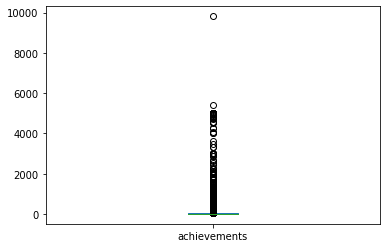

In [ ]:
steam_uni_bi['achievements'].plot.box()

Podemos perceber pelo gráfico que temos outliers!

vamos checar a simetria:

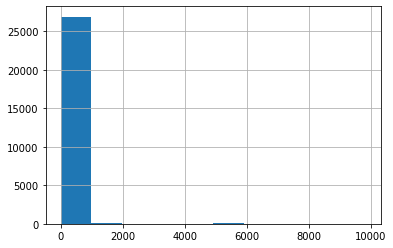

In [ ]:
steam_uni_bi['achievements'].hist()

Grafico não está assimétrico, talvez com log na base 10 ele fique

Para lidar com valores "0" vamos primeiramente aplicar o log normalmente, após isso eles serão NAN então substituirei por 0.1 pois isso vai fazer o código interpretar que essa linha tem "1" achievements ao invés de "0". Além disso queremos conservar linhas com valores 0 pois é normal um jogo não ter achievements, porém muito estranho quando ele tem centenas.

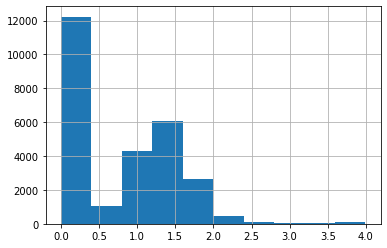

In [ ]:
steam_uni_bi['achievements_log'] = log10(steam_uni_bi[steam_uni_bi['achievements'] != 0]['achievements'])

steam_uni_bi['achievements_log'] = steam_uni_bi['achievements_log'].fillna(0.1)

steam_uni_bi['achievements_log'].hist()

Agora sim temos um gráfico simétrico!

Vamos remover os outliers agora! Para isso vamos calcular os quartis, e depois usar isso para filtrar a coluna

In [ ]:
q1 = steam_uni_bi['achievements_log'].quantile(q=0.25)
q3 = steam_uni_bi['achievements_log'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

1.2617278360175928


Vamos ver agora os dados que são outliers:

In [ ]:
steam_uni_bi[steam_uni_bi['achievements_log'] < (q1-1.5*iqr)]

,name,release_date,developer,publisher,achievements,positive_ratings,negative_ratings,owners,price,windows,...,linux,multi_player,single_player,indie,action,casual,rpg,simulation,price_dist,achievements_log


Resultado esperado como dito antes

Selecionamos "1.1" como threshold pois com esse valor pegamos realmente valores fora da linha.

In [ ]:
steam_uni_bi[steam_uni_bi['achievements_log'] > (q3+1.1*iqr)]


,name,release_date,developer,publisher,achievements,positive_ratings,negative_ratings,owners,price,windows,...,linux,multi_player,single_player,indie,action,casual,rpg,simulation,price_dist,achievements_log
245,Champions Online,2011-06-14,Cryptic Studios,Perfect World Entertainment,709,2081,823,1500000,0.00,1,...,0,1,0,0,0,0,1,0,"(-0.001, 0.79]",2.850646
501,Train Simulator 2019,2015-09-17,Dovetail Games,Dovetail Games - Trains,1165,8573,5336,1500000,34.99,1,...,0,0,1,0,0,0,0,1,"(9.29, 421.99]",3.066326
1156,Fallen Earth Free2Play,2012-02-22,Little Orbit,Little Orbit,650,3938,3142,3500000,0.00,1,...,0,1,0,0,0,0,1,0,"(-0.001, 0.79]",2.812913
1332,Guns of Icarus Online,2012-10-29,Muse Games,Muse Games,849,12932,1276,3500000,3.99,1,...,1,1,0,1,1,0,0,1,"(3.19, 5.19]",2.928908
1467,PAYDAY 2,2013-08-13,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,1130,308657,56523,15000000,7.49,1,...,1,1,1,0,1,0,1,0,"(5.19, 9.29]",3.053078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22710,!LABrpgUP!,2018-06-13,UPandQ,UPandQ,2021,11,8,10000,0.79,1,...,0,0,1,1,0,1,1,0,"(-0.001, 0.79]",3.305566
22785,Hentai Memory,2018-07-20,Pirotexnik,Pirotexnik,3000,611,62,35000,0.79,1,...,0,0,1,1,0,1,0,0,"(-0.001, 0.79]",3.477121
22830,Dinosaur Hunt Puzzle,2018-06-13,Racing Bros,ANPA.US,4987,76,27,10000,0.00,1,...,1,0,1,1,0,1,0,0,"(-0.001, 0.79]",3.697839
22923,18+,2018-07-03,КиКо,КиКо,5000,87,45,35000,0.79,1,...,1,0,1,1,0,1,0,0,"(-0.001, 0.79]",3.698970


Agora vamos removê-los

In [ ]:
print(len(steam_uni_bi))
steam_uni_bi = steam_uni_bi[(steam_uni_bi['achievements_log'] > (q1-1.5*iqr)) & (steam_uni_bi['achievements_log'] < (q3+1.1*iqr))]
print(len(steam_uni_bi))

27075
26843


In [ ]:
steam_uni_bi = steam_uni_bi.drop('achievements_log', axis=1)

##### price

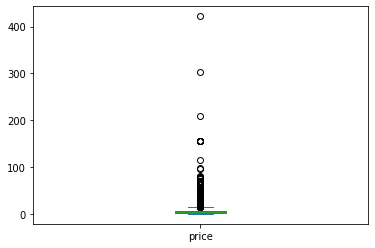

In [ ]:
steam_uni_bi['price'].plot.box()

Podemos perceber pelo gráfico que temos outliers!

vamos checar a simetria:

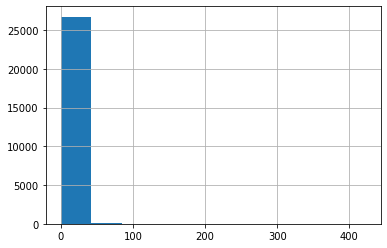

In [ ]:
steam_uni_bi['price'].hist()

Grafico não está assimétrico, talvez com log na base 10 ele fique

Para lidar com valores "0" vamos primeiramente aplicar o log normalmente, após isso eles serão NAN então substituirei por 0.1 pois isso vai fazer o código interpretar que essa linha tem "1" dolar como preço invés de "0". Além disso queremos conservar linhas com valores 0 pois é normal um jogo ser de graça, são chamados os free-to-play, porém muito estranho quando eles passam a ficar caros demais.

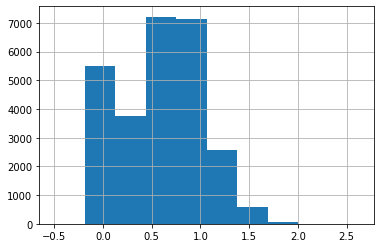

In [ ]:
steam_uni_bi['price_log'] = log10(steam_uni_bi[steam_uni_bi['price'] != 0]['price'])

steam_uni_bi['price_log'] = steam_uni_bi['price_log'].fillna(0.1)

steam_uni_bi['price_log'].hist()

Agora sim temos um gráfico "simétrico"!

Vamos remover os outliers agora! Para isso vamos calcular os quartis, e depois usar isso para filtrar a coluna

In [ ]:
q1 = steam_uni_bi['price_log'].quantile(q=0.25)
q3 = steam_uni_bi['price_log'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

0.628842185769209


Vamos ver agora os dados que são outliers:

In [ ]:
steam_uni_bi[steam_uni_bi['price_log'] < (q1-1.5*iqr)]

,name,release_date,developer,publisher,achievements,positive_ratings,negative_ratings,owners,price,windows,...,linux,multi_player,single_player,indie,action,casual,rpg,simulation,price_dist,price_log


Resultado esperado como dito antes

Escolhemos "1.3" como threshold pois observamos que apartir desse valor é que pegamos só jogos com valores absurdos

In [ ]:
steam_uni_bi[steam_uni_bi['price_log'] > (q3+1.3*iqr)]


,name,release_date,developer,publisher,achievements,positive_ratings,negative_ratings,owners,price,windows,...,linux,multi_player,single_player,indie,action,casual,rpg,simulation,price_dist,price_log
1102,3DCoat 4.8,2012-10-02,Pilgway,Pilgway,0,75,5,10000,95.99,1,...,0,0,0,0,0,0,0,0,"(9.29, 421.99]",1.982226
1498,RPG Maker VX Ace,2012-12-10,KADOKAWA,Degica,0,3372,210,750000,52.99,1,...,0,0,0,0,0,0,1,0,"(9.29, 421.99]",1.724194
1854,Wing IDE 5,2014-04-30,Wingware,Wingware,0,16,2,10000,60.99,1,...,1,0,1,0,0,0,0,0,"(9.29, 421.99]",1.785259
1904,Clickteam Fusion 2.5,2013-12-05,Clickteam,Clickteam,0,616,71,150000,69.99,1,...,0,1,1,0,0,0,0,0,"(9.29, 421.99]",1.845036
1988,Leadwerks Game Engine,2014-01-06,Leadwerks Software,Leadwerks Software,3,211,77,35000,78.99,1,...,0,0,1,0,0,0,0,0,"(9.29, 421.99]",1.897572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21571,DEAD OR ALIVE 6,2019-02-28,"KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.",36,1454,836,35000,54.99,1,...,0,1,1,0,1,0,0,0,"(9.29, 421.99]",1.740284
23234,Nelke & the Legendary Alchemists ~Ateliers of ...,2019-03-25,"KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.",50,87,16,10000,49.99,1,...,0,0,1,0,0,0,1,0,"(9.29, 421.99]",1.698883
23322,The Caligula Effect: Overdose,2019-03-12,FURYU Corporation;Engine Software BV,"NIS America, Inc.",37,87,13,10000,49.99,1,...,0,0,1,0,0,0,1,0,"(9.29, 421.99]",1.698883
23709,Cine Tracer,2018-09-28,Matt Workman,Cinematography Database,0,28,5,10000,69.99,1,...,0,0,1,0,0,0,0,1,"(9.29, 421.99]",1.845036


Agora vamos removê-los

In [ ]:
print(len(steam_uni_bi))
steam_uni_bi = steam_uni_bi[(steam_uni_bi['price_log'] > (q1-1.5*iqr)) & (steam_uni_bi['price_log'] < (q3+1.3*iqr))]
print(len(steam_uni_bi))

26843
26770


In [ ]:
steam_uni_bi = steam_uni_bi.drop('price_log', axis=1)

Faltam duas colunas serem tratadas, positive_ratings e negative_ratings, vamos usar outra técnica de outlier para tratar elas:

#### Remoção de outliers (bivariado) 

##### Razão entre variaveis

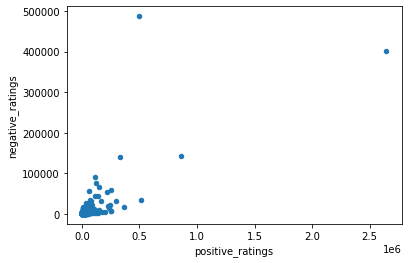

In [ ]:
steam_uni_bi.plot.scatter(x='positive_ratings',y='negative_ratings')

In [ ]:
steam_uni_bi['grade'] = (steam_uni_bi['positive_ratings']+0.0001) / (steam_uni_bi['negative_ratings']+0.0001)
steam_uni_bi['grade'].describe()

count    2.677000e+04
mean     7.313670e+03
std      3.722011e+04
min      4.545434e-06
25%      1.399996e+00
50%      3.199956e+00
75%      8.499625e+00
max      1.140001e+06
Name: grade, dtype: float64

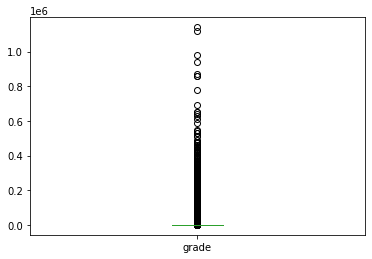

In [ ]:
steam_uni_bi['grade'].plot.box()

Podemos ver que temos outliers!

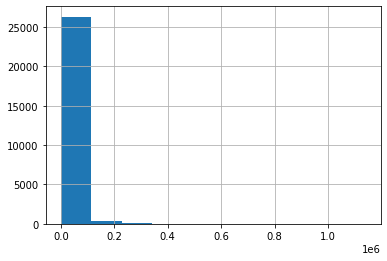

In [ ]:
steam_uni_bi['grade'].hist()

O gráfico não é simétrico, vamos ver o log:

In [ ]:
steam_uni_bi['grade_log'] = log10(steam_uni_bi['grade'])

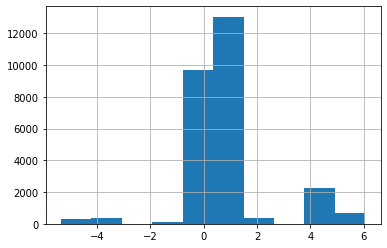

In [ ]:
steam_uni_bi['grade_log'].hist()

Agora sim temos um gráfico simétrico! Vamos calcular os outliers:

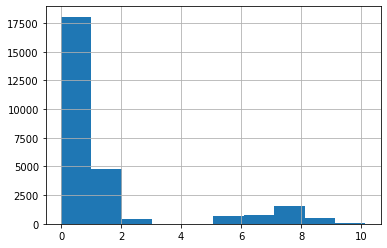

In [ ]:
mad = abs(steam_uni_bi['grade_log'] - steam_uni_bi['grade_log'].median()).median()*(1/0.6745)
(abs(steam_uni_bi['grade_log']-steam_uni_bi['grade_log'].median())/mad).hist()

Abaixo temos os valores que serão deletados

In [ ]:
steam_uni_bi[abs(steam_uni_bi['grade_log']-steam_uni_bi['grade_log'].median())/mad > 3.5]


,name,release_date,developer,publisher,achievements,positive_ratings,negative_ratings,owners,price,windows,...,multi_player,single_player,indie,action,casual,rpg,simulation,price_dist,grade,grade_log
577,Raycatcher,2009-04-17,Thinking Studios;Slam Dunk Studios,Thinking Studios,0,0,13,10000,3.99,1,...,0,1,1,0,1,0,0,"(3.19, 5.19]",0.000008,-5.113947
679,Kuros,2009-09-21,Sandlot Games,Sandlot Games,0,7,0,10000,4.99,1,...,0,1,0,0,1,0,0,"(3.19, 5.19]",70001.000000,4.845104
683,Angle of Attack,2009-08-17,3000AD,3000AD,0,0,2,10000,6.99,1,...,1,1,0,1,0,0,1,"(5.19, 9.29]",0.000050,-4.301052
694,Wandering Willows™,2009-08-12,PlayFirst,PlayFirst,0,20,0,10000,10.99,1,...,0,1,0,0,1,1,0,"(9.29, 421.99]",200001.000000,5.301032
700,Fitness Dash™,2010-05-06,Sarbakan,PlayFirst,0,8,0,10000,4.99,1,...,0,1,0,0,1,0,0,"(3.19, 5.19]",80001.000000,4.903095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27068,Old Edge II,2019-04-23,LTrust,LTrust,0,4,0,10000,0.79,1,...,0,1,1,0,1,0,1,"(-0.001, 0.79]",40001.000000,4.602071
27070,Room of Pandora,2019-04-24,SHEN JIAWEI,SHEN JIAWEI,7,3,0,10000,2.09,1,...,0,1,1,0,1,0,0,"(0.79, 3.19]",30001.000000,4.477136
27072,Super Star Blast,2019-04-24,EntwicklerX,EntwicklerX,24,0,1,10000,3.99,1,...,1,1,1,1,1,0,0,"(3.19, 5.19]",0.000100,-4.000043
27073,New Yankee 7: Deer Hunters,2019-04-17,Yustas Game Studio,Alawar Entertainment,0,2,0,10000,5.19,1,...,0,1,1,0,1,0,0,"(3.19, 5.19]",20001.000000,4.301052


Vamos ver agora quantas linhas o nosso dataset vai ter depois de deletar os valores.

In [ ]:
print(len(steam_uni_bi))
steam_uni_bi = steam_uni_bi[abs(steam_uni_bi['grade_log']-steam_uni_bi['grade_log'].median())/mad < 3.5]
print(len(steam_uni_bi))

26770
23207


In [ ]:
steam_uni_bi = steam_uni_bi.drop('grade', axis=1)
steam_uni_bi = steam_uni_bi.drop('grade_log', axis=1)

#### Remoção de outliers (multivariado) 

In [ ]:
steam_mu = steam.copy()
steam_mu.dtypes

name                      category
release_date        datetime64[ns]
developer                 category
publisher                 category
achievements                 int64
positive_ratings             int64
negative_ratings             int64
owners                       int64
price                      float64
windows                      int64
mac                          int64
linux                        int64
multi_player                 int64
single_player                int64
indie                        int64
action                       int64
casual                       int64
rpg                          int64
simulation                   int64
price_dist                category
dtype: object

Vamos substituir os valores categoricos:

In [ ]:
steam_mu['developer'] = steam_mu['developer'].cat.codes
steam_mu['publisher'] = steam_mu['publisher'].cat.codes
steam_mu['price_dist'] = steam_mu['price_dist'].cat.codes
steam_mu['name'] = steam_mu['name'].cat.codes
steam_mu.drop('release_date', axis=1, inplace=True)

Agora vamos usar o metodo Elliptic Envelope. Temos uma biblioteca para isso:

In [ ]:
from sklearn.covariance import EllipticEnvelope
detector = EllipticEnvelope(contamination=0.01)
detector.fit(steam_mu)

EllipticEnvelope(contamination=0.01)

Agora vamos pegar os scores, que diz se a linha é outlier ou não.

In [ ]:
scores = detector.predict(steam_mu)
print(scores)

[-1 -1 -1 ...  1  1  1]


Vamos adicionar esses scores nas suas reespectivas linhas e então filtrar as linhas que tem o valor "-1"

In [ ]:
steam_mu = steam.copy()
steam_mu['outlier'] = scores
print(steam_mu[['name', 'outlier']])

                             name  outlier
0                  Counter-Strike       -1
1           Team Fortress Classic       -1
2                   Day of Defeat       -1
3              Deathmatch Classic       -1
4       Half-Life: Opposing Force       -1
...                           ...      ...
27070             Room of Pandora        1
27071                   Cyber Gun        1
27072            Super Star Blast        1
27073  New Yankee 7: Deer Hunters        1
27074                   Rune Lord        1

[27075 rows x 2 columns]


Serão deletados os itens abaixo:

In [ ]:
steam_mu[steam_mu['outlier'] == -1].head(20)

,name,release_date,developer,publisher,achievements,positive_ratings,negative_ratings,owners,price,windows,...,linux,multi_player,single_player,indie,action,casual,rpg,simulation,price_dist,outlier
0,Counter-Strike,2000-11-01,Valve,Valve,0,124534,3339,15000000,7.19,1,...,1,1,0,0,1,0,0,0,"(5.19, 9.29]",-1
1,Team Fortress Classic,1999-04-01,Valve,Valve,0,3318,633,7500000,3.99,1,...,1,1,0,0,1,0,0,0,"(3.19, 5.19]",-1
2,Day of Defeat,2003-05-01,Valve,Valve,0,3416,398,7500000,3.99,1,...,1,1,0,0,1,0,0,0,"(3.19, 5.19]",-1
3,Deathmatch Classic,2001-06-01,Valve,Valve,0,1273,267,7500000,3.99,1,...,1,1,0,0,1,0,0,0,"(3.19, 5.19]",-1
4,Half-Life: Opposing Force,1999-11-01,Gearbox Software,Valve,0,5250,288,7500000,3.99,1,...,1,1,1,0,1,0,0,0,"(3.19, 5.19]",-1
5,Ricochet,2000-11-01,Valve,Valve,0,2758,684,7500000,3.99,1,...,1,1,0,0,1,0,0,0,"(3.19, 5.19]",-1
6,Half-Life,1998-11-08,Valve,Valve,0,27755,1100,7500000,7.19,1,...,1,1,1,0,1,0,0,0,"(5.19, 9.29]",-1
7,Counter-Strike: Condition Zero,2004-03-01,Valve,Valve,0,12120,1439,15000000,7.19,1,...,1,1,1,0,1,0,0,0,"(5.19, 9.29]",-1
8,Half-Life: Blue Shift,2001-06-01,Gearbox Software,Valve,0,3822,420,7500000,3.99,1,...,1,0,1,0,1,0,0,0,"(3.19, 5.19]",-1
9,Half-Life 2,2004-11-16,Valve,Valve,33,67902,2419,15000000,7.19,1,...,1,0,1,0,1,0,0,0,"(5.19, 9.29]",-1


In [ ]:
print(len(steam_mu))
steam_mu = steam_mu[steam_mu['outlier'] != -1]
print(len(steam_mu))

27075
26804


## Estatística descritiva dos dados com visualização

Na detecção de ouliers seguimos duas vertentes, a primeira é calcular os outliers coluna por coluna ou de duas em duas colunas, a segunda é calcular os outliers por um método multivalorado. Precisamos agora decidir qual das duas abordagens seguiremos

In [ ]:
steam_st = steam_mu.copy()
steam_st.describe()


,achievements,positive_ratings,negative_ratings,owners,price,windows,mac,linux,multi_player,single_player,indie,action,casual,rpg,simulation,outlier
count,26804.000000,26804.000000,26804.000000,2.680400e+04,26804.000000,26804.000000,26804.000000,26804.000000,26804.000000,26804.000000,26804.000000,26804.000000,26804.000000,26804.000000,26804.000000,26804.0
mean,39.159678,385.778279,92.491158,8.078365e+04,5.981572,0.999813,0.295814,0.191054,0.194523,0.949709,0.727056,0.440046,0.382555,0.161058,0.194262,1.0
std,307.096502,1534.928967,355.324811,2.830024e+05,7.339004,0.013657,0.456416,0.393138,0.395841,0.218549,0.445481,0.496402,0.486020,0.367591,0.395639,0.0
min,0.000000,0.000000,0.000000,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,6.000000,2.000000,1.000000e+04,1.690000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,7.000000,24.000000,9.000000,1.000000e+04,3.990000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,22.000000,119.000000,39.000000,3.500000e+04,7.190000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0
max,5000.000000,23414.000000,6912.000000,3.500000e+06,303.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [ ]:
steam_st = steam_uni_bi.copy()
steam_st.describe()


,achievements,positive_ratings,negative_ratings,owners,price,windows,mac,linux,multi_player,single_player,indie,action,casual,rpg,simulation
count,23207.000000,2.320700e+04,23207.000000,2.320700e+04,23207.000000,23207.000000,23207.000000,23207.000000,23207.000000,23207.000000,23207.000000,23207.000000,23207.000000,23207.000000,23207.000000
mean,17.649890,1.137835e+03,238.281812,1.524049e+05,6.092859,0.999871,0.311458,0.205067,0.207868,0.946439,0.717628,0.441591,0.360796,0.169259,0.202913
std,32.998088,2.039601e+04,4604.076085,1.428516e+06,6.456617,0.011369,0.463099,0.403760,0.405791,0.225155,0.450163,0.496587,0.480242,0.374989,0.402177
min,0.000000,1.000000e+00,1.000000,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000e+01,4.000000,1.000000e+04,1.690000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,3.400000e+01,13.000000,1.000000e+04,3.990000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,1.670000e+02,53.000000,3.500000e+04,7.190000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,555.000000,2.644404e+06,487076.000000,1.500000e+08,46.490000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observando os resultados, vamos optar por manter o método multivalorado, pois ele deleta menos linhas, os resultados parecem mais suaves e ao mesmo tempo limita melhor valores absurdamente grandes ou pequenos

In [ ]:
steam_st = steam_mu.copy()

### Plataformas

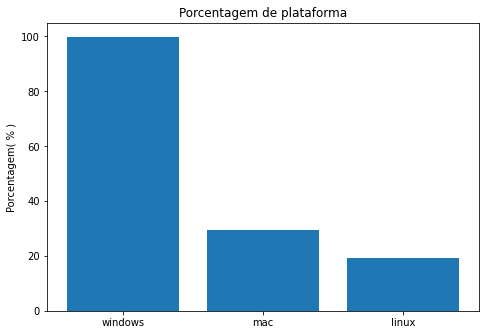

In [ ]:
users_windows = (steam_st['windows'].sum() / len(steam_st)) *100 
users_mac = (steam_st['mac'].sum() / len(steam_st)) *100 
users_linux = (steam_st['linux'].sum() / len(steam_st)) *100 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
platform = ['windows' , 'mac' , 'linux']
users = [users_windows , users_mac , users_linux]
ax.bar(platform, users)
ax.set_title("Porcentagem de plataforma")
ax.set_ylabel("Porcentagem( % )")

plt.show()


Podemos inferir que aproximadamente 100%, ou seja, quase toda a totalidade dos jogos da Steam são disponiveis em plataformas _Windows_

### Desenvolvedora e distribuidora 

È possivel determinar quantas empresas são tanto a desenvolvedora quanto distribuidora de um jogo.

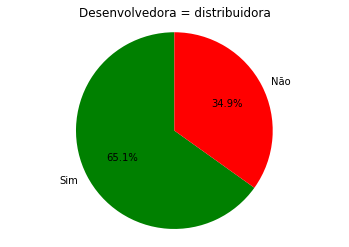

Quantidade de jogos que a desenvolvedora que tambem é  distribuidora:  17456


In [ ]:
dev = steam_st['developer'].astype("str")
pub = steam_st['publisher'].astype("str")
labels = ["Sim" , "Não"]
colors = ['green' , 'red']

dev_and_pub = steam_st[dev == pub]
not_dev_and_pub = steam_st[dev != pub]

sizes = [len(dev_and_pub) , (len(not_dev_and_pub) )]


plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.title("Desenvolvedora = distribuidora")
plt.axis('equal')
plt.show()
print("Quantidade de jogos que a desenvolvedora que tambem é  distribuidora: " , len(steam_st[dev == pub]))

Com isso, podemos inferir que em 63,6% dos jogos , a desenvolvedora também foi a distribuidora

### Atribuindo uma nota para o jogo

Criar uma coluna nova chamada _grade_ que indica a nota de um jogo com base nas avaliações positivas e negativas de um jogo, sendo a nota a porcentagem de avaliaçoes positivas entre a soma de avaliaçoes positivas e negativcas

In [ ]:
steam_st['grade'] = (steam_st['positive_ratings']  / (steam_st['positive_ratings'] + steam_st['negative_ratings'] + 0.0001)) * 100


In [ ]:
steam_st.corr(method="spearman")['grade'].sort_values(ascending=False)

grade               1.000000
positive_ratings    0.201673
achievements        0.149142
price               0.120217
mac                 0.112360
linux               0.103848
single_player       0.060352
indie               0.057476
casual              0.007323
owners             -0.003378
windows            -0.004475
rpg                -0.010926
action             -0.019882
multi_player       -0.031727
simulation         -0.124539
negative_ratings   -0.318912
outlier                  NaN
Name: grade, dtype: float64

Dessa forma, podemos ver que os atributos que mais possuem correlaçao com a nota de um jogo, sao positive_ratings, achievements e price, como positive_ratings já faz parte do calculo de _grade_ , então o que mais influencia em uma nota ser alta em um jogo são o preço e as conquistas.

Como a correlação com preço é ascendente, é interessante perceber que jogos maiores e mais caros tendem a ter uma nota maior.

### O que tende aumentar o numero de vendas de um jogo

In [ ]:
steam_st.corr(method="spearman")['owners'].sort_values(ascending=False)

owners              1.000000
negative_ratings    0.722480
positive_ratings    0.705455
multi_player        0.153860
achievements        0.136609
mac                 0.123700
linux               0.118611
rpg                 0.063744
price               0.034172
action              0.026374
windows             0.003203
grade              -0.003378
simulation         -0.025603
single_player      -0.068244
casual             -0.142618
indie              -0.153729
outlier                  NaN
Name: owners, dtype: float64

È de se esperar que _negative_ratings_ e _positive_rating_ tenham uma correlação forte, pois quando mais pessoas possuem o jogo, mais avaliações são feitas.

È interessante observar a influencia que jogo ser _multi_player_ causa na quantidade de donos do jogo, principalmente quando comparado com uma das principais correlaçoes negativas que é _single_player_. Logo, isso confirma uma tendencia da industria de focar cada vez mais no multiplayer do que no singleplayer, para atrair mais publico.

Ver correlação entre os dados

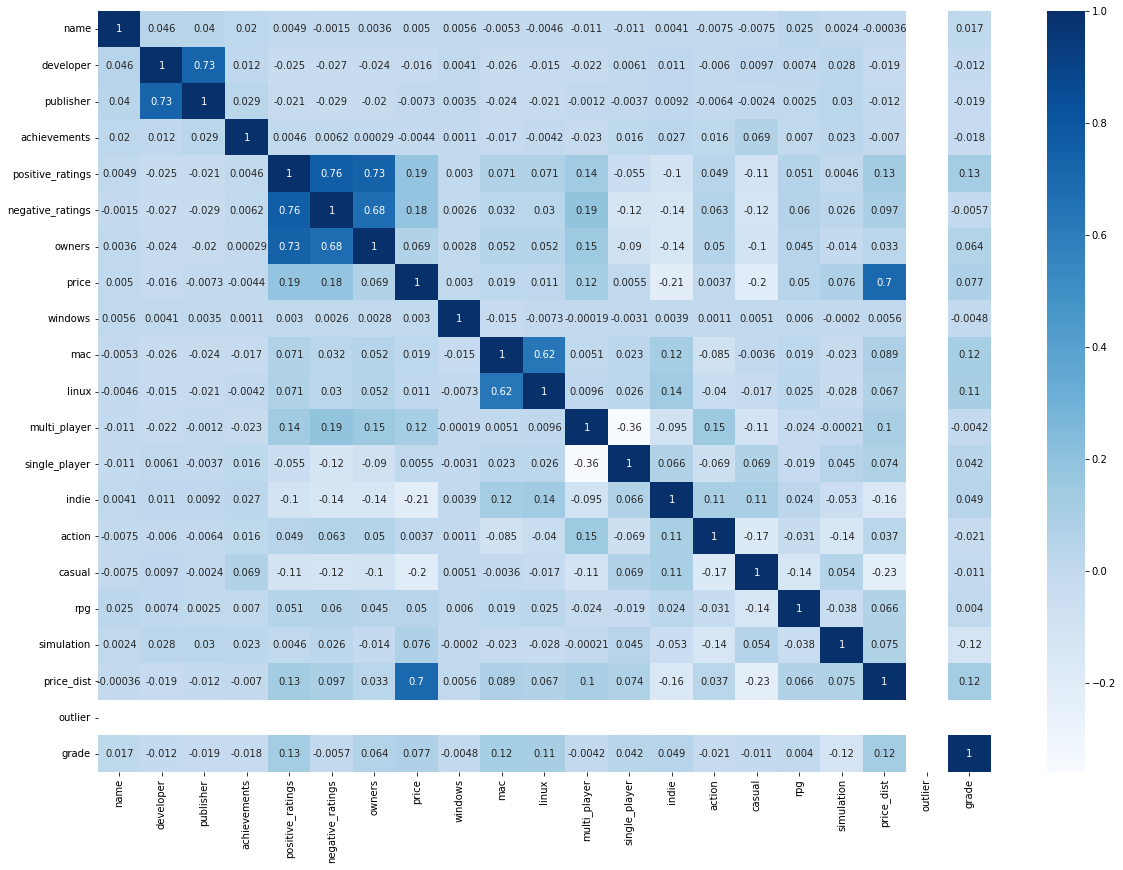

In [ ]:
corr_steam = steam_st.apply(lambda x: x.cat.codes if x.dtype == 'category' else x).corr(method='pearson')
fig , ax = plt.subplots(figsize=(20,14))
sns.heatmap(corr_steam , cmap='Blues' , annot=True)

### Qual genero de jogo tende a vender mais?

Baseado na correlação, o genero de _**action**_ é o que mais influencia nas vendas de um jogo, entre os generos mais famosos.

### Plotagem de boxplots para as colunas numéricas

Price

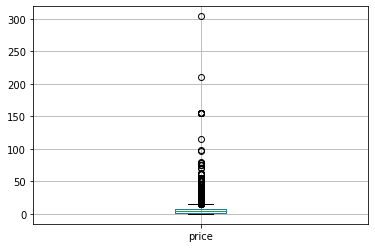

In [ ]:
steam_st.boxplot(column='price')

Achievements

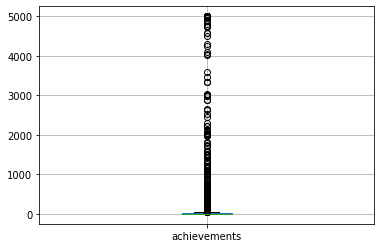

In [ ]:
steam_st.boxplot(column='achievements')

Positive ratings

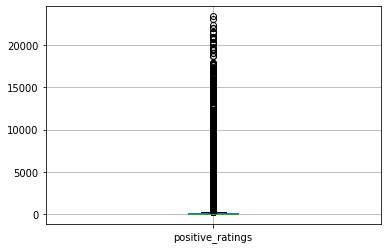

In [ ]:
steam_st.boxplot(column='positive_ratings')

Negative ratings

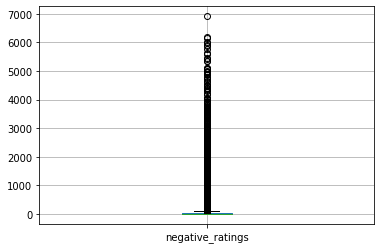

In [ ]:
steam_st.boxplot(column='negative_ratings')

Owners

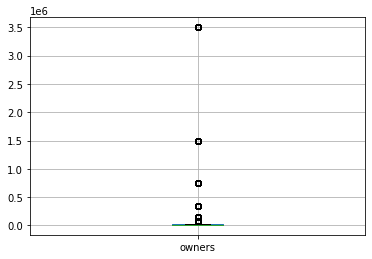

In [ ]:
steam_st.boxplot(column='owners')

Plotagem de grafico da nota pelo preço

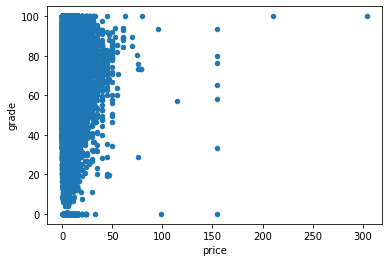

In [ ]:
steam_st.plot.scatter(x='price' , y='grade')

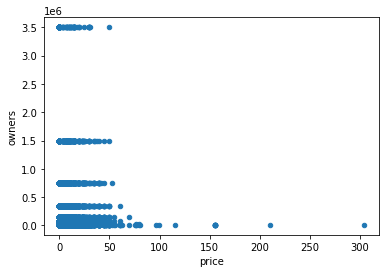

In [ ]:
steam_st.plot.scatter(x='price' , y='owners')

## Teste de hipotese

Para calcular o teste de hipotese entre duas amostras criamos o metodo abaixo, ele usara o t-teste caso ambos os dados sejam normalizados e man-whitneyu caso contrario.

In [ ]:
signi = 0.05

def is_normal(sample):
  _, p_val = stats.shapiro(sample)
  return p_val >= 0.05

def get_variance(sample_1, sample_2):
  _,p_val = stats.levene(sample_1, sample_2)
  return p_val

def hipo_test(sample_1, sample_2):
  is_sample_1_normal = is_normal(sample_1)
  is_sample_2_normal = is_normal(sample_2)
  variance = get_variance(sample_1, sample_2)
  if is_sample_1_normal & is_sample_2_normal:
    return stats.ttest_ind(sample_1, sample_2, variance >= signi)
  else:
    return mannwhitneyu(sample_1, sample_2)

Além disso iremos usar o dataframe com tratamento de outliers multivalorado

In [ ]:
steam = steam_st.copy()

### Hipotese nula: As vendas dos jogos __single-players__ são iguais aos dos jogos __multi-players__

###Hipotese alternativa: As vendas dos jogos __single-players__ são diferentes aos dos jogos __multi-players__

Significancia = 0.05



In [ ]:
single_player_sells = steam[steam['single_player'] == 1]['owners']
multi_player_sells = steam[steam['multi_player'] == 1]['owners']

Agora selecionado os samples, vamos vizualizar a diferença entre esses samples:

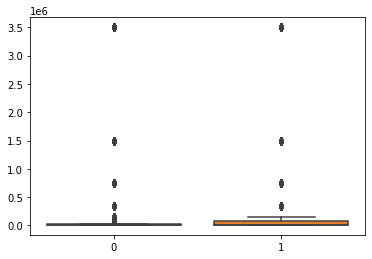

In [ ]:
sns.boxplot(data=[single_player_sells, multi_player_sells])

In [ ]:
df = pd.DataFrame()
df['single_player_sells'] = single_player_sells
df['multi_player_sells'] = multi_player_sells
df[['single_player_sells', 'multi_player_sells']].describe()

,single_player_sells,multi_player_sells
count,2.545600e+04,4.119000e+03
mean,7.490572e+04,1.592826e+05
std,2.591259e+05,4.448068e+05
min,1.000000e+04,1.000000e+04
25%,1.000000e+04,1.000000e+04
50%,1.000000e+04,1.000000e+04
75%,3.500000e+04,7.500000e+04
max,3.500000e+06,3.500000e+06


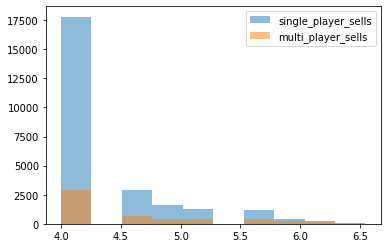

In [ ]:
log_single_player_sells = log10(single_player_sells)
log_multi_player_sells = log10(multi_player_sells)
plt.hist(log_single_player_sells, alpha=0.5, label='single_player_sells')
plt.hist(log_multi_player_sells, alpha=0.5, label='multi_player_sells')
plt.legend(loc='upper right')
plt.show()

In [ ]:
print(len(single_player_sells), len(multi_player_sells))

25456 5214


In [ ]:
hipo_test(single_player_sells, multi_player_sells)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


MannwhitneyuResult(statistic=56078631.0, pvalue=1.9648932196872136e-100)

Como as amostras não estavam em distribuição normal, utilizou-se o teste Mann-Whitney

Portanto, como  _p-value < 0.05_, a hipótese nula é __rejeitada__, ou seja, __existe diferença entre as vendas de jogos _single-player_ com _multi-player_.__

### Hipotese nula: As avaliações dos jogos __single-players__ são iguais aos dos jogos __multi-players__

###Hipotese alternativa: As avaliações dos jogos __single-players__ são diferentes aos dos jogos __multi-players__

Significancia = 0.05



In [ ]:
single_player_grade = steam[steam['single_player'] == 1]['grade']
multi_player_grade = steam[steam['multi_player'] == 1]['grade']

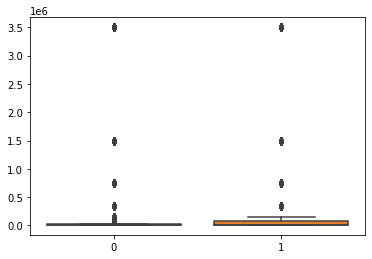

In [ ]:
sns.boxplot(data=[single_player_sells, multi_player_sells])

In [ ]:
df = pd.DataFrame()
df['single_player_grade'] = single_player_grade
df['multi_player_grade'] = multi_player_grade
df[['single_player_grade', 'multi_player_grade']].describe()

,single_player_grade,multi_player_grade
count,25456.000000,4119.000000
mean,71.579877,72.290028
std,23.491788,20.522192
min,0.000000,0.000000
25%,58.615646,61.166686
50%,76.470138,76.216806
75%,89.541242,87.369344
max,99.999912,99.999811


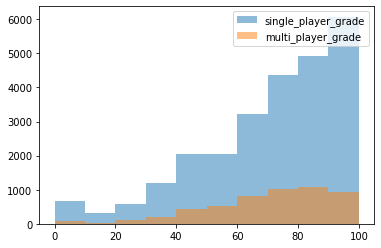

In [ ]:
log_single_player_grade = single_player_grade
log_multi_player_grade = multi_player_grade
plt.hist(log_single_player_grade, alpha=0.5, label='single_player_grade')
plt.hist(log_multi_player_grade, alpha=0.5, label='multi_player_grade')
plt.legend(loc='upper right')
plt.show()

In [ ]:
print(len(single_player_grade), len(multi_player_grade))

25456 5214


In [ ]:
hipo_test(single_player_grade, multi_player_grade)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


MannwhitneyuResult(statistic=69422535.0, pvalue=1.507284982938285e-07)

Como as amostras não estavam em distribuição normal, utilizou-se o teste Mann-Whitney

Portanto, como  _p-value < 0.05_, a hipótese nula é __rejeitada__, ou seja, __existe diferença entre as avaliações de jogos _single-player_ com _multi-player_.__